In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df1 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2011.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2012.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2013.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2014.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Projects/emmisions_clustering/datasets/gt_2015.csv")

df = df1.append([df2,df3,df4,df5])

In [57]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [58]:
df.shape

(36733, 11)

In [59]:
total_len = (len(df1)+len(df2)+len(df3)+len(df4)+len(df5))

In [60]:
total_len

36733

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
scaler = scaler.fit(df)
scaled = scaler.transform(df)

In [65]:
df = pd.DataFrame(scaled,columns=df.columns)

In [66]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.249727,0.647291,0.782894,0.269481,0.272873,0.853147,0.980288,0.435959,0.385552,0.007397,0.596213
1,0.242929,0.639409,0.790252,0.268594,0.271657,0.852148,0.985848,0.435959,0.384421,0.010146,0.600734
2,0.233960,0.641379,0.798437,0.270749,0.273351,0.856144,0.989386,0.441369,0.412685,0.010227,0.615616
3,0.230247,0.639409,0.806004,0.270387,0.269919,0.856144,0.988880,0.440488,0.402887,0.005231,0.602096
4,0.230432,0.629557,0.802693,0.269898,0.270180,0.850150,0.984584,0.435959,0.387813,0.006056,0.597021


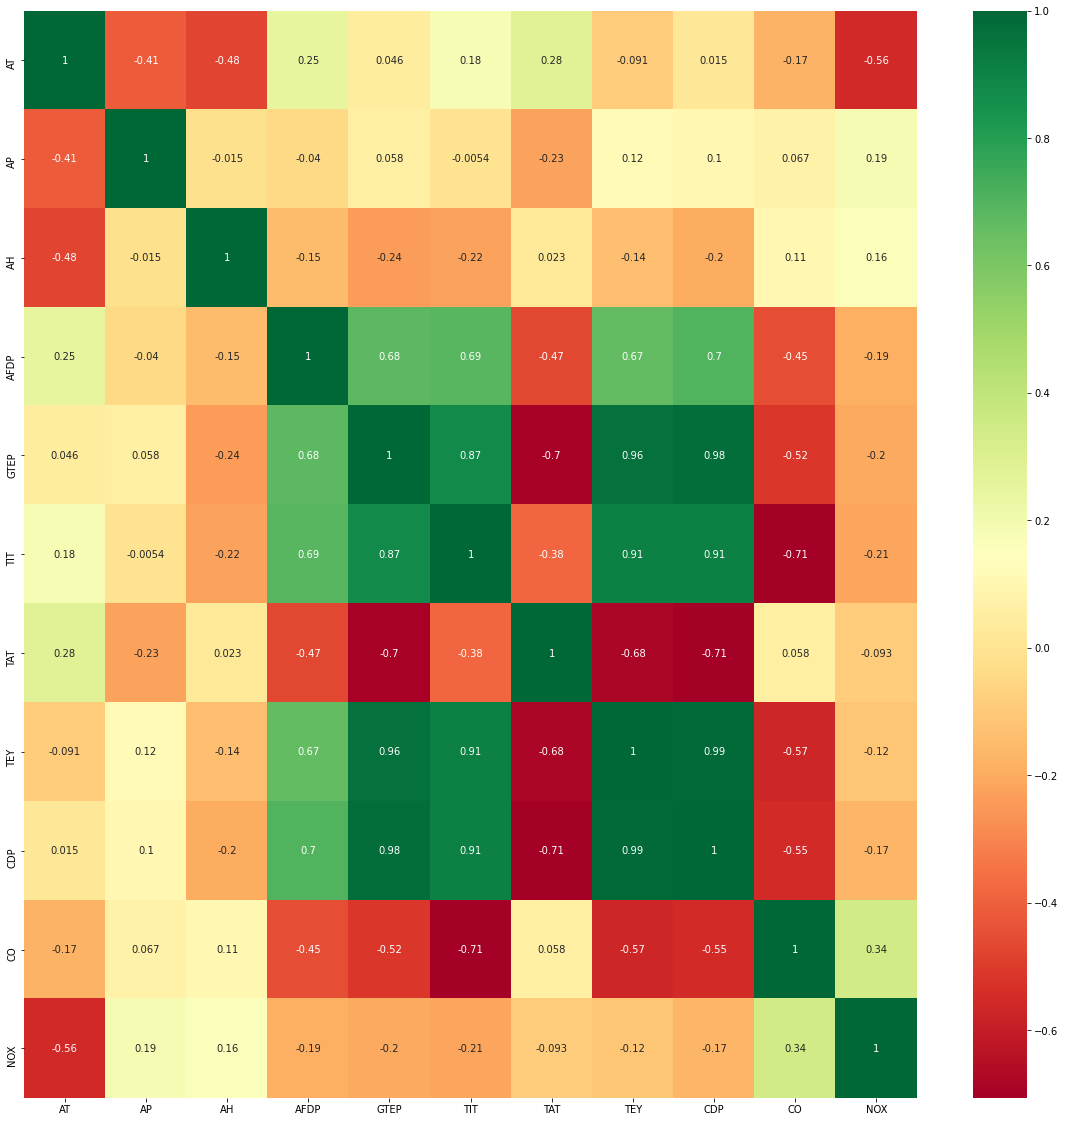

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [15]:
data = df[['CO','NOX']].copy()

In [16]:
data.head()

,CO,NOX
0,0.007397,0.596213
1,0.010146,0.600734
2,0.010227,0.615616
3,0.005231,0.602096
4,0.006056,0.597021


Text(0, 0.5, 'NOX')

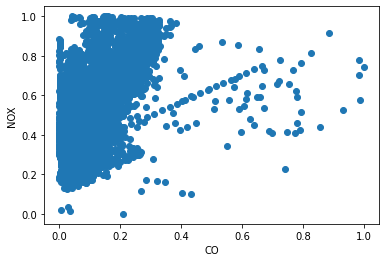

In [17]:
plt.scatter(df.CO,df['NOX'])
plt.xlabel('CO')
plt.ylabel('NOX')

## Using KMeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data)
y_predicted

array([1, 1, 1, ..., 0, 2, 0], dtype=int32)

In [20]:
km.cluster_centers_

array([[0.18630749, 0.74621659],
       [0.04814984, 0.49723948],
       [0.04640136, 0.33268841]])

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(data,y_predicted)

0.47985553531865716

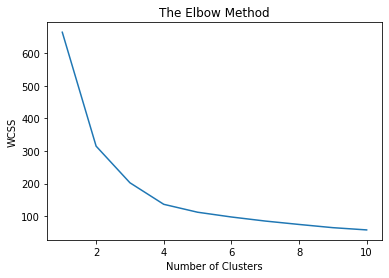

In [23]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
df['kmeans'] = y_predicted
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,kmeans
0,0.249727,0.647291,0.782894,0.269481,0.272873,0.853147,0.980288,0.435959,0.385552,0.007397,0.596213,1
1,0.242929,0.639409,0.790252,0.268594,0.271657,0.852148,0.985848,0.435959,0.384421,0.010146,0.600734,1
2,0.233960,0.641379,0.798437,0.270749,0.273351,0.856144,0.989386,0.441369,0.412685,0.010227,0.615616,1
3,0.230247,0.639409,0.806004,0.270387,0.269919,0.856144,0.988880,0.440488,0.402887,0.005231,0.602096,1
4,0.230432,0.629557,0.802693,0.269898,0.270180,0.850150,0.984584,0.435959,0.387813,0.006056,0.597021,1


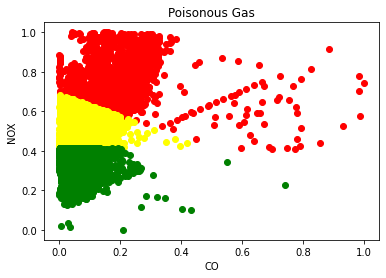

In [31]:
df1 = df[df.kmeans==0]
df2 = df[df.kmeans==1]
df3 = df[df.kmeans==2]
plt.scatter(df1.CO,df1['NOX'],color='red')
plt.scatter(df2.CO,df2['NOX'],color='yellow')
plt.scatter(df3.CO,df3['NOX'],color='green')
plt.title('Poisonous Gas')
plt.xlabel('CO')
plt.ylabel('NOX')
plt.show()

## Using Hierarchical

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_predicted = cluster.fit_predict(data)

In [34]:
y_predicted

array([1, 1, 1, ..., 2, 0, 2])

In [50]:
df['CLUSTER'] = y_predicted

In [36]:
silhouette_score(data,y_predicted)

0.4784541079369336

No handles with labels found to put in legend.


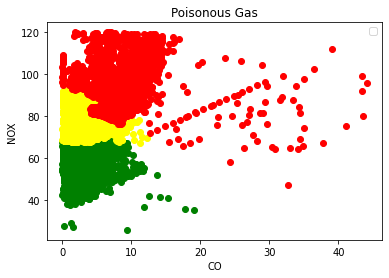

In [51]:
df1 = df[df.CLUSTER==0]
df2 = df[df.CLUSTER==1]
df3 = df[df.CLUSTER==2]
plt.scatter(df1.CO,df1['NOX'],color='green')
plt.scatter(df2.CO,df2['NOX'],color='yellow')
plt.scatter(df3.CO,df3['NOX'],color='red')
plt.title('Poisonous Gas')
plt.xlabel('CO')
plt.ylabel('NOX')
plt.legend()

In [42]:
filename = 'hierarchical_clustering.pkl'

In [43]:
import pickle

In [44]:
pickle.dump(cluster,open(filename,'wb'))

In [45]:
model = pickle.load(open('/content/hierarchical_clustering.pkl','rb'))

In [46]:
predicted = model.fit_predict(data)

In [52]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CLUSTER
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,1
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,1
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,1
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,1
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,1


In [53]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CLUSTER
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067,0.390221
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357,0.579763
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000,0.000000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000,0.000000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000,0.000000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000,1.000000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000,2.000000


In [54]:
df.to_csv('clustered_data.csv')

In [67]:
filename2 = 'scalar.pkl'
pickle.dump(scaler,open(filename2,'wb'))